# Лабораторная работа 2
# Алгоритмы машинного обучения
### _Студент: Мамчур А. В._
### _Группа: М80-304Б._

## _Постановка задачи_
Требуется реализовать класс на выбранном языке программирования, который реализует один из алгоритмов машинного обучения. Обязательным является наличия в классе двух методов fit, predict. Необходимо проверить работу вашего алгоритма на ваших данных (на таблице и на текстовых данных), произведя необходимую подготовку данных. Также необходимо реализовать алгоритм полиномиальной регрессии, для предсказания значений в таблице. Сравнить результаты с стандартной реализацией sklearn, определить в чем сходство и различие ваших алгоритмов. Замерить время работы алгоритмов. Каркас класса на языке Python:<br>

class MLAlgo(object):

def __init__(self,*pargs,**kwargs):

pass

def fit(self,x,y):

pass

def predict(self,x,y):

Выбор алгоритма осуществляется по: 7 % 6 + 1 =2 => KNN

__Оборудование:__ Ноутбук Asus X554L Intel Core i3-5005U 2000 МГц, память 4 ГБ, 64-разрядная ос.<br>
__Программное обеспечение:__ Windows 10, jupyter notebook.<br>
__Датасет1:__Мельбурнский рынок жилья(Содержит категориальные, количественные признаки.)<br>
Ссылка: https://www.kaggle.com/anthonypino/melbourne-housing-market#Melbourne_housing_FULL.csv<br>
__Датасет2:__Набор данных полярности настроения(Представляет собой корпус документов, содержащий 1000 положительных и 1000 отрицательных обзоров на фильмы.)<br>
Ссылка: https://www.kaggle.com/anindya2906/movie-review-polarity

### _Алгоритм_

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:<br>
- Вычислить расстояние до каждого из объектов обучающей выборки
- Отобрать k объектов обучающей выборки, расстояние до которых минимально
- Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей

## Табличные данные

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [49]:
df.columns #все мои колонки

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [15]:
df.info() #информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

__Предварительная обработка данных__

In [50]:
columns_need = ['Rooms','Type','Price','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']

df = df[columns_need]
df = df.dropna() #так как есть пропуски => убираем все nan значения из данных

df = df.iloc[::3,:]
X = df.drop('Type',axis=1)
Y = df['Type'].astype('str')

df.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2965 entries, 2 to 34853
Data columns (total 10 columns):
Rooms            2965 non-null int64
Type             2965 non-null object
Price            2965 non-null float64
Distance         2965 non-null float64
Bathroom         2965 non-null float64
Car              2965 non-null float64
Landsize         2965 non-null float64
BuildingArea     2965 non-null float64
YearBuilt        2965 non-null float64
Propertycount    2965 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 254.8+ KB


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
11,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
24,3,1350000.0,2.5,2.0,2.0,214.0,190.0,2005.0,4019.0
32,3,1200000.0,2.5,2.0,1.0,113.0,110.0,1880.0,4019.0
38,4,1330000.0,2.5,2.0,2.0,780.0,135.0,1900.0,4019.0



Первый датасет классифицируем по типу жилья:<br>
h - house,cottage,villa, semi,terrace;<br>
u - unit, duplex;<br>
t - townhouse; <br>
Заменяю строчки на цифры

In [51]:
Y[Y == 'h'] = 0
Y[Y == 'u'] = 1
Y[Y == 't'] = 2
Y = Y.astype('int')

print((Y==0).sum()) #выводит сколько всего такого типа
print((Y==1).sum())
print((Y==2).sum())
print(Y[:10]) #первые 10 значений

2201
520
244
2     0
11    0
24    0
32    0
38    0
44    0
56    0
59    0
66    2
70    0
Name: Type, dtype: int32


Также для того, чтобы наглядно показать какие ошибки мы совершили при классификации построим heatmap.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import time

#для построения heatmap
def heat_map_plot(y_t,y_p):
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_t, y_p)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()
    
table = []; #для вывода в конце всех метрик, времени и тд в табличном виде

In [53]:
# разделяем данные

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.2,
                                                   random_state=0) #20% данных для теста, а 80% для тренировки
print("Кол-во тренировочных данных = " + str(len(x_train)))
print("Кол-во тестовых данных = " + str(len(y_test)))


Кол-во тренировочных данных = 2372
Кол-во тестовых данных = 593


__Реализация класса KNN__

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy.linalg as la

#теперь реализуем свой класс knn
class knn:
    
    #тут выбираем метрику и кол-во соседей
    def __init__(self,k=5,metric='minkowski'):
        self.k = k
        self.metric = metric
    
    #тк knn ленивый алгоритм, то fit блок просто сводится к запоминанию данных
    #для дальнейшего их использования в predict методе
    def fit(self,x,y):
        self.x_train = x;
        self.y_train = y;
        
    def predict(self,x_test):
        #для каждого тестового элемента
        res = []
        dist = self.choice() #получаем функцию по которой будем считать расстояние
        for i in range(x_test.shape[0]):
            distances = []
            targets = {}
            for j in range(self.x_train.shape[0]):
                distance = dist(self.x_train[j],x_test[i])
                distances.append([distance, j])

            distances = sorted(distances)
        
            for j in range(self.k): #рассматриваем только первые k ближайших
                index = distances[j][1]
                elem = self.y_train[index] 
                if(elem in targets): #тут голосуем за класс
                    targets[elem] += 1;
                else:
                    targets[elem] = 1
                    
            #получаем класс с наибольшим кол-вом голосов
            res.append(sorted(targets.items(), key=lambda a:a[1], reverse=True)[0][0])
        return res
    
    #далее идут метрики
    def euclid(self,x,y):
        return np.sqrt(np.sum((x - y)**2))

    def manhattan(self,x,y):
        return np.sum(np.abs(x - y))

    def chebyshev(self,x,y):
        return np.max(np.abs(x - y))

    def minkowski(self,x,y,p=1.2):
        return np.sum(np.abs(x - y)**p)**(1/p)
    
    def cosin(self,a,b):
        return round(np.inner(a, b)/(la.norm(a)*la.norm(b)), 3)
    
    def choice(self):
        if(self.metric == 'euclid'):
            return self.euclid
        elif(self.metric == 'manhattean'):
            return self.manhattan
        elif(self.metric == 'chebyshev'):
            return self.chebyshev
        elif(self.metric == 'minkowski'):
            return self.minkowski
        elif(self.metric == 'cosin'):
            return self.cosin
        else:
            return self.euclid #по умолчанию

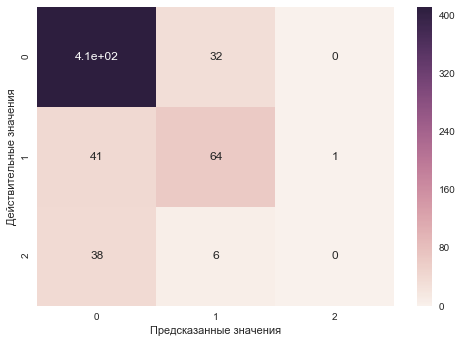

accuracy =  0.8010118043844857
time = 24.78718137741089 sec


In [54]:
x = x_train.values
y = y_train.values

kn = knn(12,'minkowski')
start_time = time.time()
kn.fit(x,y)
y_pred = kn.predict(x_test.values)
t = (time.time() - start_time)
heat_map_plot(y_test,y_pred)
print("accuracy = ",metrics.accuracy_score(y_test, y_pred))#выводим точность классификации
print("time = " + str(t) + " sec")# выводим затраченное время

__Реализация sklearn__

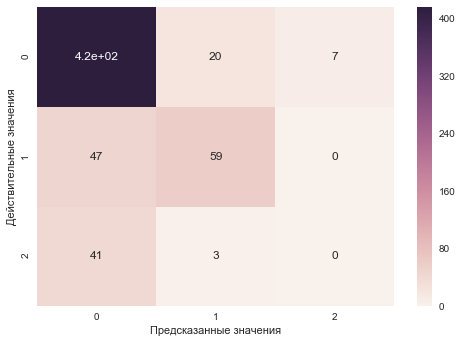

accuracy =  0.8010118043844857
time = 0.08898735046386719 sec


In [55]:
#метод k- ближайших соседей
cls = KNeighborsClassifier(algorithm='brute')
start_time = time.time()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
t = (time.time() - start_time)
heat_map_plot(y_test,y_pred)
print("accuracy = ",metrics.accuracy_score(y_test, y_pred))
print("time = " + str(t) + " sec")

## Текстовые данные
В качестве предварительной обработки я достаю из файла данные в виде списка, трансформирую в tfidf, чтобы подать на вход классификатору.<br>
Классификация на негативные и позитивные отзывы<br>
TF-IDF - это простой и удобный способ оценить важность термина для какого-либо документа относительно всех остальных документов. Принцип такой — если слово встречается в каком-либо документе часто, при этом встречаясь редко во всех остальных документах — это слово имеет большую значимость для того самого документа.


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


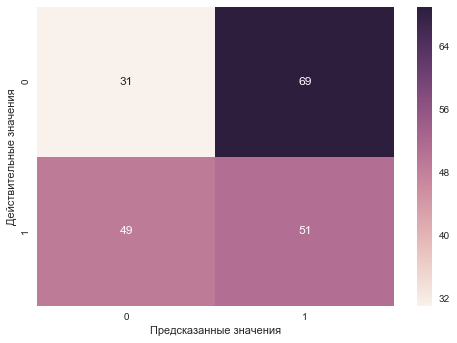

accuracy =  0.41
time = 72.5184166431427 sec


In [59]:
#теперь анализируем второй датасет с текстом
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.csr import csr_matrix
import os


def get_corpus(path,s):
    for i in os.listdir(path): #ищем подходящий файл на диске
        if(s in i):
            name = path +'/'+ i
            break
    f = open(name,"r")
    res = f.read()
    f.close()
    return res

#получаем данные из файлов
def get_data(k,s=0):
    path_pos = 'txt_sentoken/pos'
    path_neg = 'txt_sentoken/neg'
    arr_pos = []
    arr_neg = []
    for i in range(k):
        if(s + i < 10):
            n = '00' + str(s + i) # s - как смещение, чтобы взять другие данные
        elif(s + i < 100):
            n = '0' + str(s + i)
        else:
            n = str(s + i)
        arr_pos.append(get_corpus(path_pos,'cv' + n))
        arr_neg.append(get_corpus(path_neg,'cv' + n))
    data = arr_pos + arr_neg #склеиваем в один список
    target = []
    for i in range(k):
        target.append(1) #positive
    for i in range(k):
        target.append(0) #negative
    return data,target

k = 700 #700 положительных и 700 отрицательных отзывов
test = 100 #для теста

#получаем тренировочные данные
data,target = get_data(k)

#обрабатываем сначала тренировочные данные
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(data)

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

#получаем тестовые данные
docs_new,y_test = get_data(test,k)
x_test_counts = count_vect.transform(docs_new)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

x_tr = x_train_tfidf.toarray()
x_ts = x_test_tfidf.toarray()

kn = knn(6,'cosin')#для tfidf удобно использовать косинусную метрику
start_time = time.time()
kn.fit(x_tr, target)
y_pred = kn.predict(x_ts)
t = (time.time() - start_time)
heat_map_plot(y_test,y_pred)
print("accuracy = ",metrics.accuracy_score(y_test, y_pred))
print("time = " + str(t) + " sec")

__Реализация sklearn__

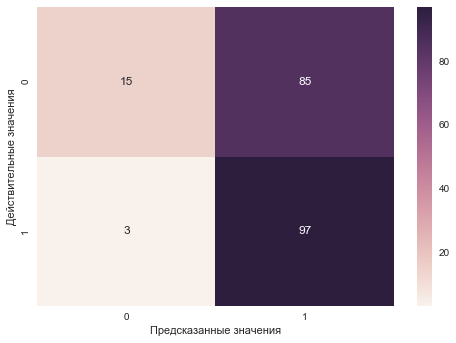

accuracy =  0.56
time = 0.9903123378753662 sec


In [58]:
cls = KNeighborsClassifier(n_neighbors = 10)
start_time = time.time()
cls.fit(x_train_tfidf, target)
y_pred = cls.predict(x_test_tfidf)
t = (time.time() - start_time)
heat_map_plot(y_test,y_pred)
print("accuracy = ",metrics.accuracy_score(y_test, y_pred))
print("time = " + str(t) + " sec")

## Полиномиальная регрессия

Index(['Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')


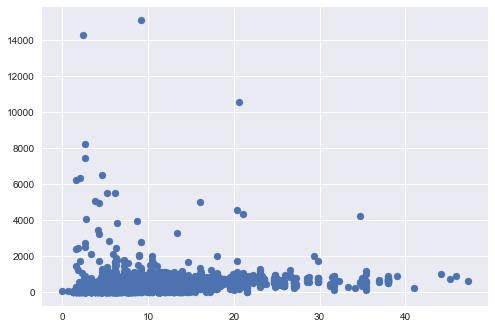

Размер выборки: 2965


In [60]:
#получаем данные из первого датасета для теста полиномиальной регрессии
print(df.columns)
plt.scatter(df['Distance'],df['Landsize'])#зависимость между расстоянием от центра и жилплощадью
plt.show()
dfs = df.copy()
dfs = dfs.sort_values(by='Distance')
x = dfs['Distance'].values #можно выбрать и другие значения полей для построения ур регрессии
y = dfs['Landsize'].values
print('Размер выборки: ' + str(len(x)))

### Реализация
Построить регрессию – это значит подобрать такую линию (точнее, функцию), которая как можно точнее приближает к себе (аппроксимирует) множество точек, полученных из данных пар. То есть надо найти приближение данных (x,y) полиномом k-степени. Я взяла полиномы 2,3,4 степеней.

y* = -0.366x^2 + 25.632x^1 + 268.555
y* = -0.009x^3 + 0.11x^2 + 18.707x^1 + 293.765
y* = 0.001x^4 + -0.129x^3 + 3.23x^2 + -10.273x^1 + 369.696


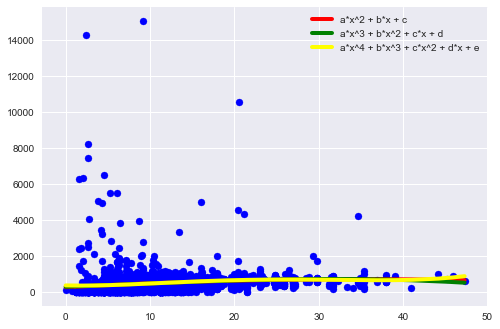

Расчет среднеквадратической ошибки:
MSE2 = 411855.11981253664
MSE3 = 411799.0104070077
MSE4 = 411520.4226740127
time = 0.8138718605041504sec


In [61]:
#реализуем полиномиальную регрессию и сравниваем её с стандартной реализацией в sklearn

#нелинейная аппроксимация (полиномиальная регрессия)
def nonlinear(x,y,p=3,z=4): #по умолчанию ax^2 + bx + c
    m = np.zeros((p,p))
    b = np.zeros(p)
    #ищем коэффициенты матрицы и члены при b
    for i in range(p):
        for j in range(p):
            m[i][j] = np.sum(x**(z-i-j))
        b[i] = np.dot(x**((z/2)-i),y)
    return np.linalg.solve(m,b)#решает систему

#для вывода функции в виде функции
def print_func(coef,rd=3):
    print('y* = ',end='')
    for i,e in enumerate(coef):
        if(i != len(coef)-1):
            print(str(round(e,rd)) + 'x^' + str(len(coef) - i - 1) + ' + ',end='')
    print(round(coef[len(coef)-1],rd))

start_time = time.time() #засекаем время

lws = 4
#--------------------------------
coef = nonlinear(x,y) #квадратичная аппроксимация
y_pp = [];
for i in x:
    y_pp.append(coef[0]*i*i + coef[1]*i + coef[2])
plt.plot(x,y_pp,color='red',label='a*x^2 + b*x + c',linewidth=lws)
print_func(coef)

#--------------------------------
coef = nonlinear(x,y,4,6) #кубическая аппроксимация
y_ppp = []
for i in x:
    arr = np.array([i**3,i**2,i,1])
    y_ppp.append(np.dot(arr,coef))
plt.plot(x,y_ppp,color='green',label='a*x^3 + b*x^2 + c*x + d',linewidth=lws)
print_func(coef)

#--------------------------------
coef = nonlinear(x,y,5,8) #аппроксимация 4-й степени
y_pppp = []
for i in x:
    arr = np.array([i**4,i**3,i**2,i,1])
    y_pppp.append(np.dot(arr,coef))
plt.plot(x,y_pppp,color='yellow',label='a*x^4 + b*x^3 + c*x^2 + d*x + e',linewidth=lws)
print_func(coef)
t = (time.time() - start_time)

plt.scatter(x,y,color='blue') #отображаем текущие точки
plt.legend()
plt.show()

#--------------------------------
y_pp,y_ppp,y_pppp = np.array(y_pp),np.array(y_ppp),np.array(y_pppp)

print('Расчет среднеквадратической ошибки:')
print('MSE2 = ' + str(((y_pp-y)**2).mean()))
print('MSE3 = ' + str(((y_ppp-y)**2).mean()))
print('MSE4 = ' + str(((y_pppp-y)**2).mean()))
print('time = ' + str(t) + 'sec')

На нормальных данных будет ошибка в районе 7-8 значений, когда функция будет идеально подходить, то около 1-2 значений. В данном случае рассчитанные коэффициенты уловили основной тренд и поэтому такая ошибка. 

__С помощью Sklearn__

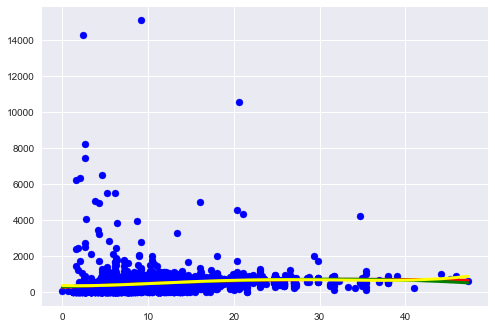

MSE2 = 411855.1198270896
MSE3 = 411799.0104487208
MSE4 = 411520.42272563983
time = 1.0208392143249512sec


In [62]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

plt.scatter(x,y,color='blue')
colors = ['red', 'green', 'yellow']
lw = 3
mse = []
start_time = time.time() #засекаем время
for count, degree in enumerate([2, 3, 4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    X = x[:, np.newaxis]
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(x, y_pred, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
    mse.append(mean_squared_error(y_pred,y))
t = (time.time() - start_time)
plt.show()

for i,e in enumerate(mse):
    print('MSE' + str(i+2) + ' = ' + str(e))
print('time = ' + str(t) + 'sec')

### Вывод
В ходе данной лаборторной работы были реализованы алгоритмы k ближайших соседей и полиномиальной регрессии. На табличных данных KNN предсказывает с точностью 80%, что не так уж и плохо. Точность моей реализации и реализации с помощью sklearn практически совпадают, но затраченное время отличается в разы (sklearn намного быстрее). Точность с текстовыми данными оказалась небольшой, но sklearn также показывает слабую точность. Возможно, данные выбраны не совсем удачно или надо было их лучше обработать. Время также сильно отличается. 